## Imports
Execute the cell below to import all packages needed.

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

## Load csv into pandas dataframe

In [2]:
path__tweets_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_nyc_all.csv'
path_users_csv = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'

nyc_tweets_df = pd.read_csv(path__tweets_csv,index_col=None, header=0, low_memory = False).applymap(str)
nyc_users_df = pd.read_csv(path_users_csv,index_col=None, header=0, low_memory = False).applymap(str)

nyc_join_df = nyc_tweets_df.join(nyc_users_df.set_index('user_id'), on='user_id')

## Extract, Count & Sort Emojis for all

In [3]:
extract = Extractor()

count = extract.count_all_emoji(nyc_join_df['text'])

# Display most common
#count.most_common()

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
237,👏,5897
33,💙,5937
172,💖,6945
197,💀,7001
12,😘,7178
171,💜,7282
150,💯,8167
161,✨,9011
113,🙄,9987
100,💕,10192


## Top 15 Emojis Graph

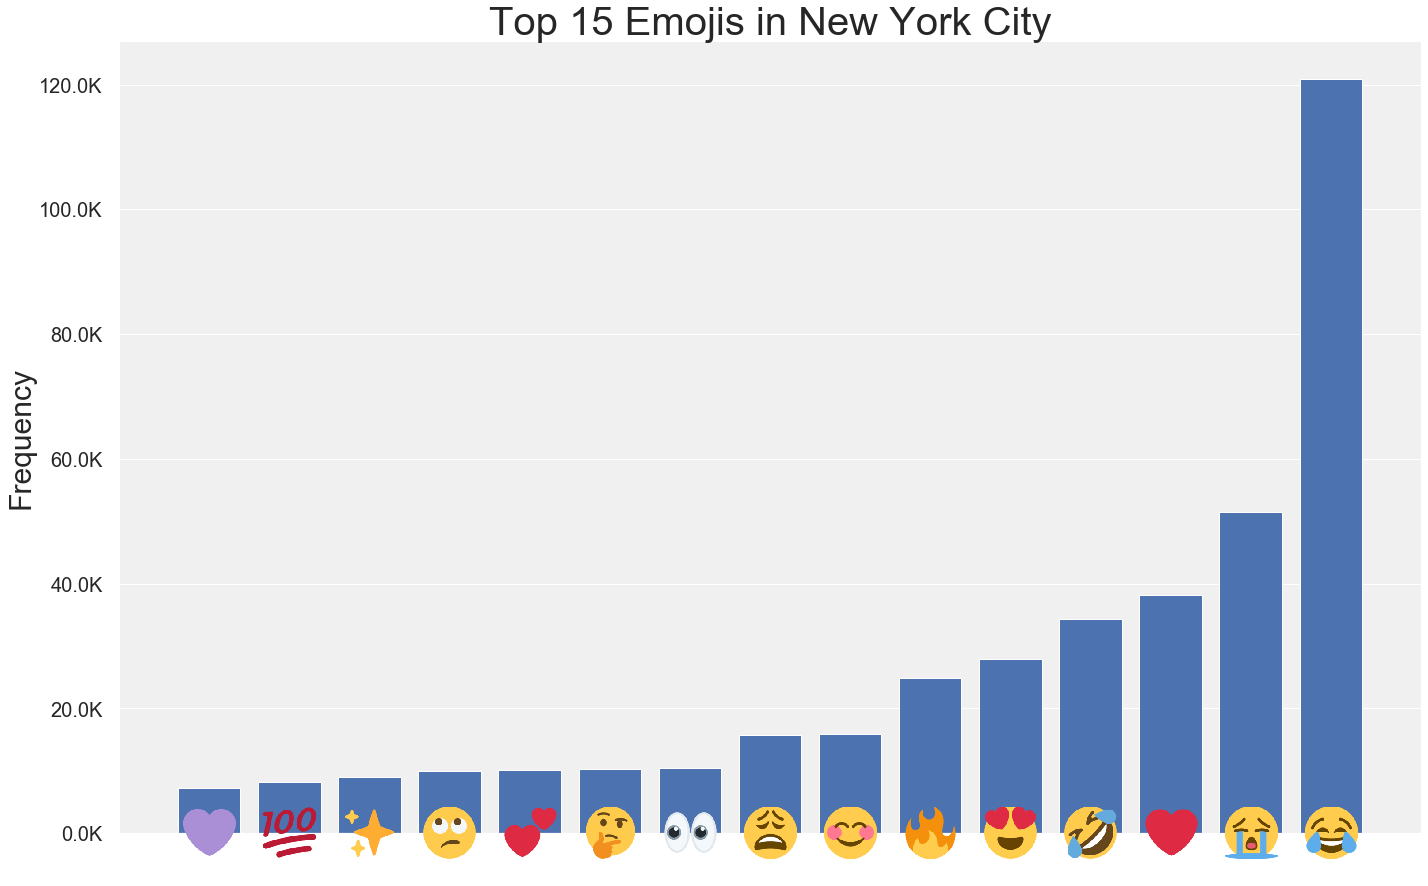

In [4]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values

# Millions Formatter Function
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)

# Create a formatter
formatter_millions = FuncFormatter(millions)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_millions)
ax.tick_params(axis='both', which='major', pad=10)
ax.set_facecolor('#0F0F0F0F')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
ax.get_xaxis().set_visible(False)
#plt.xticks(x, fontproperties=emojis_font)  Old method
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top 15 Emojis in New York City', fontsize =40)
plt.tight_layout()

# Set sizes of figure and images
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
img_size = ax_width/(fig_width*len(x_linespace))
img_axs = [None for i in range(len(x_linespace))]


# Display emojis pngs on x-axis
for i in range(len(x)):
    loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
    img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                               img_size, img_size], anchor='C')
    
    # Platform 5 = Twitter
    img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
    img_axs[i].axis("off")

plt.show()

## Extract, Count & Sort Emojis for females

In [5]:
# Count emojis (Gender Confidence =1)
count_females = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['gender'] == 'female')& (nyc_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_females:
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : count_females[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(20)

,Emoji,Count
21,💛,2072
95,💯,2091
136,♥,2117
108,💜,2243
110,💖,2259
137,👀,2385
73,🤔,2464
186,💀,2580
153,😊,2725
106,✨,2994


## Extract, Count & Sort Emojis for males

In [6]:
# Count emojis (Gender Confidence =1)
count_males = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['gender'] == 'male')& (nyc_join_df['gender:confidence'].astype(float)==1)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_males:
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : count_males[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(20)

,Emoji,Count
19,🙏,1247
55,💪🏾,1270
138,👏,1334
155,😎,1410
68,🗣,1447
40,🙄,1491
56,💀,1600
39,😁,1659
287,💯,1769
327,🖤,2022


## Top 15 Emojis Graph by Gender

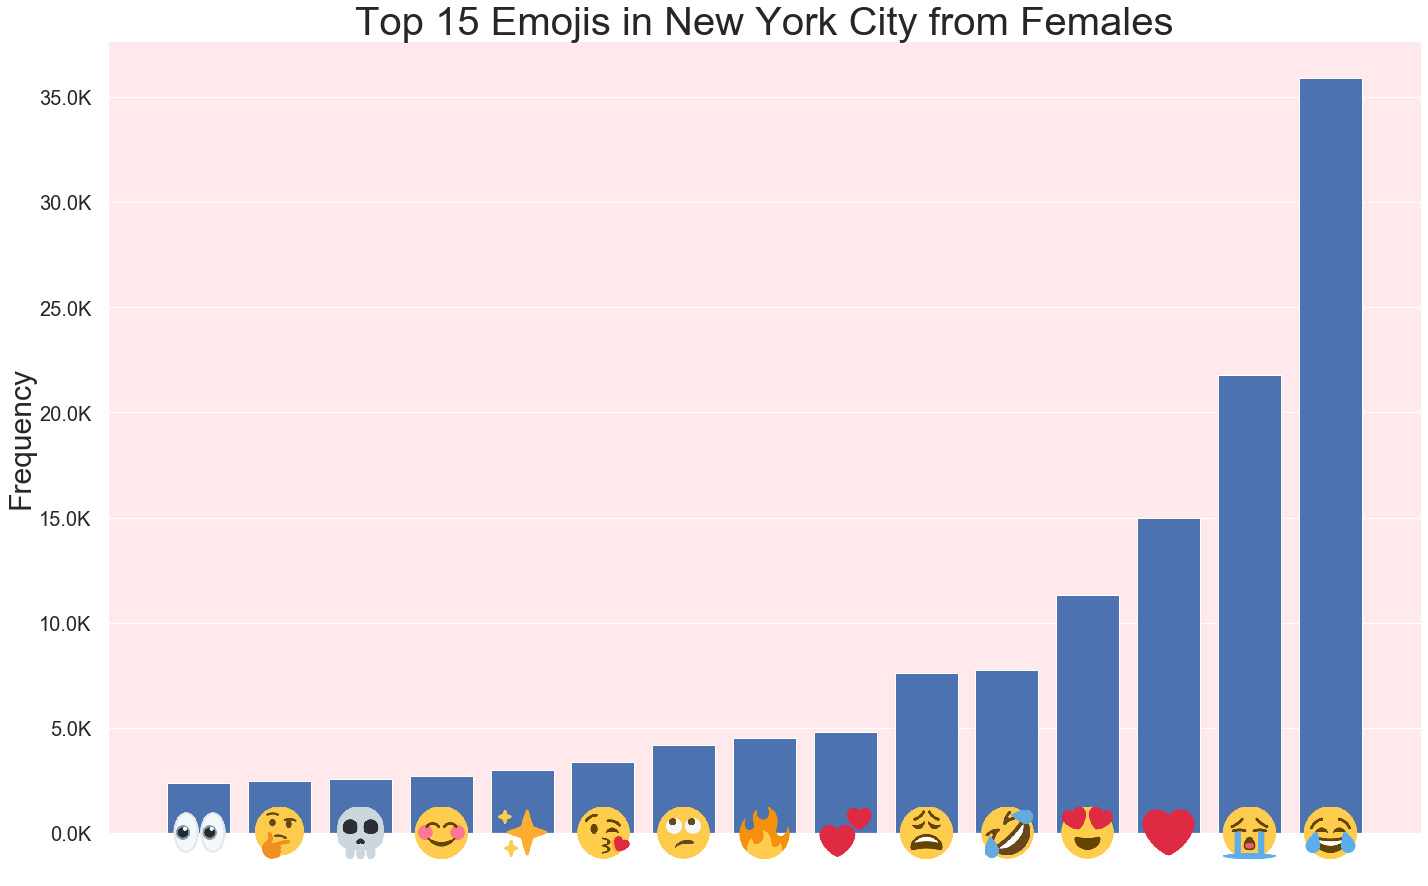

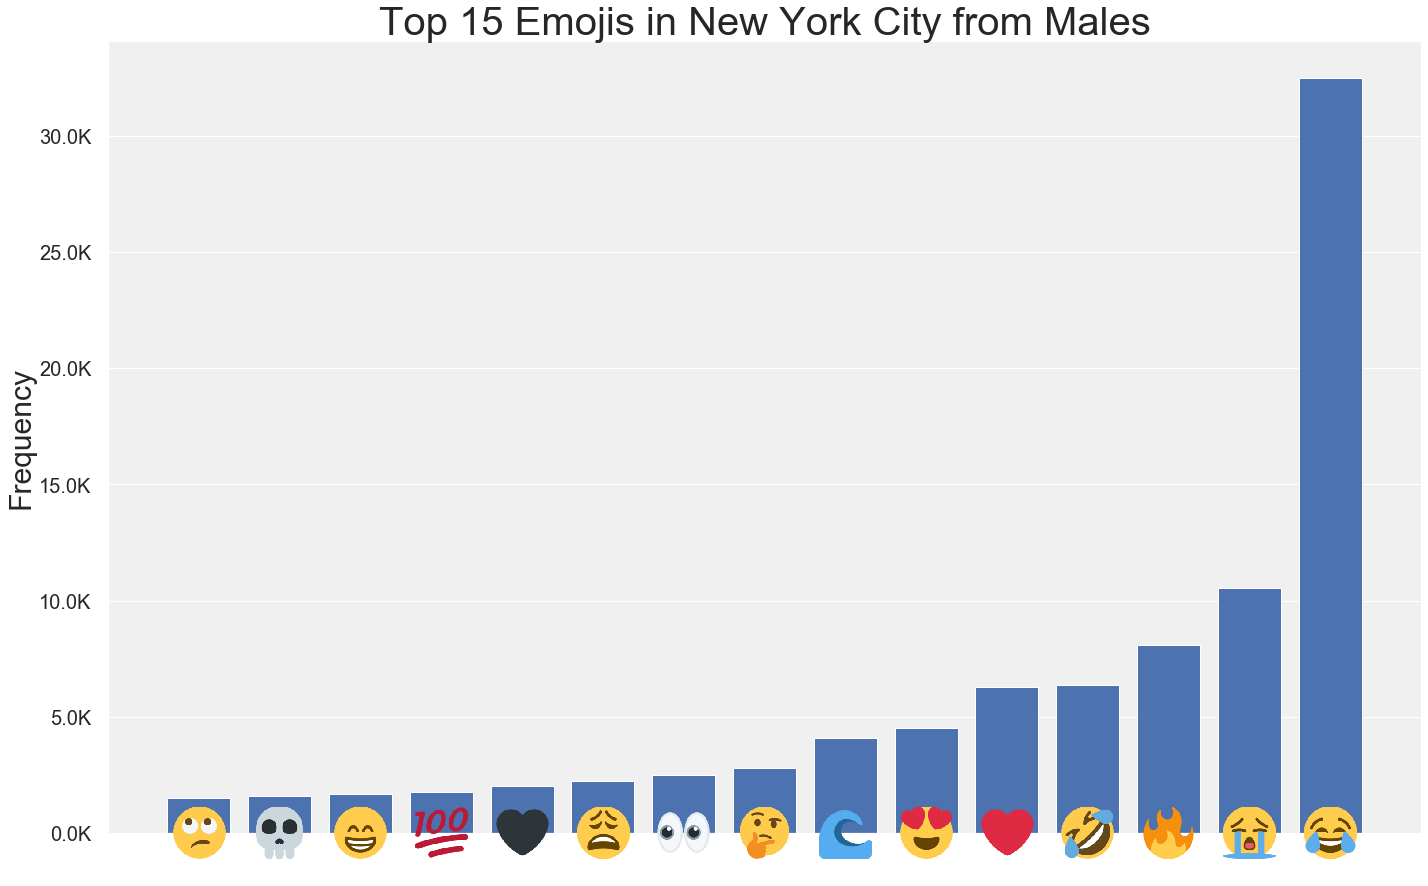

In [7]:
gender_list = ['Females','Males']
gender_values =[emojis_count_females_df,emojis_count_males_df]
gender_graph_colours=['ffe9ec','0F0F0F0F']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in New York City from {}'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [8]:
# Count emojis (Ethnicity Confidence: 0.8)
count_white = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['ethnicity'] == 'white')& (nyc_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_white:
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Count' : count_white[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_white_df = emojis_count_white_df.sort_values(by=['Count'])
emojis_count_white_df.tail(20)

,Emoji,Count
131,🙄,1388
126,👀,1454
17,🙏,1477
118,😩,1626
35,💜,1647
37,💖,1664
10,🇺🇸,1687
4,🤔,1729
125,😊,1731
42,✨,1815


## Extract, Count & Sort Emojis for Black Ethnicity

In [9]:
# Count emojis (Ethnicity Confidence: 0.8)
count_black = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['ethnicity'] == 'black')& (nyc_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_black:
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Count' : count_black[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_black_df = emojis_count_black_df.sort_values(by=['Count'])
emojis_count_black_df.tail(20)

,Emoji,Count
63,😒,1262
19,😁,1391
36,💪🏾,1393
43,💕,1452
10,😘,1469
8,🙌🏾,1479
0,🗣,1832
6,🙏🏾,1918
21,🤔,2066
22,👀,2106


## Extract, Count & Sort Emojis for Hispanic Ethnicity

In [10]:
# Count emojis (Ethnicity Confidence: 0.8)
count_hispanic = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['ethnicity'] == 'hispanic')& (nyc_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_hispanic_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_hispanic:
    emojis_count_hispanic_df = emojis_count_hispanic_df.append({'Emoji' : emoji , 'Count' : count_hispanic[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_hispanic_df = emojis_count_hispanic_df.sort_values(by=['Count'])
emojis_count_hispanic_df.tail(20)

,Emoji,Count
85,🤷🏽‍♀️,12
53,😱,12
82,🎼,12
42,💪🏽,12
150,🎵,12
56,😘,15
29,😤,15
64,🙏🏽,16
73,🎶,17
20,🙄,17


## Extract, Count & Sort Emojis for Asian Ethnicity

In [11]:
# Count emojis (Ethnicity Confidence: 0.8)
count_asian = extract.count_all_emoji(nyc_join_df.loc[(nyc_join_df['ethnicity'] == 'asian')& (nyc_join_df['ethnicity:confidence'].astype(float)>0.8)]['text'])

# Create panda dataframe to store emojis with counts
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count_asian:
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Count' : count_asian[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_asian_df = emojis_count_asian_df.sort_values(by=['Count'])
emojis_count_asian_df.tail(20)

,Emoji,Count
49,👏🏼,56
41,😊,66
94,👀,67
4,👌🏻,70
3,🔥,74
185,🤗,76
87,🎉,83
44,😍,83
78,🤙🏼,84
311,🌸,84


## Top 15 Emojis Graph by Ethnicity

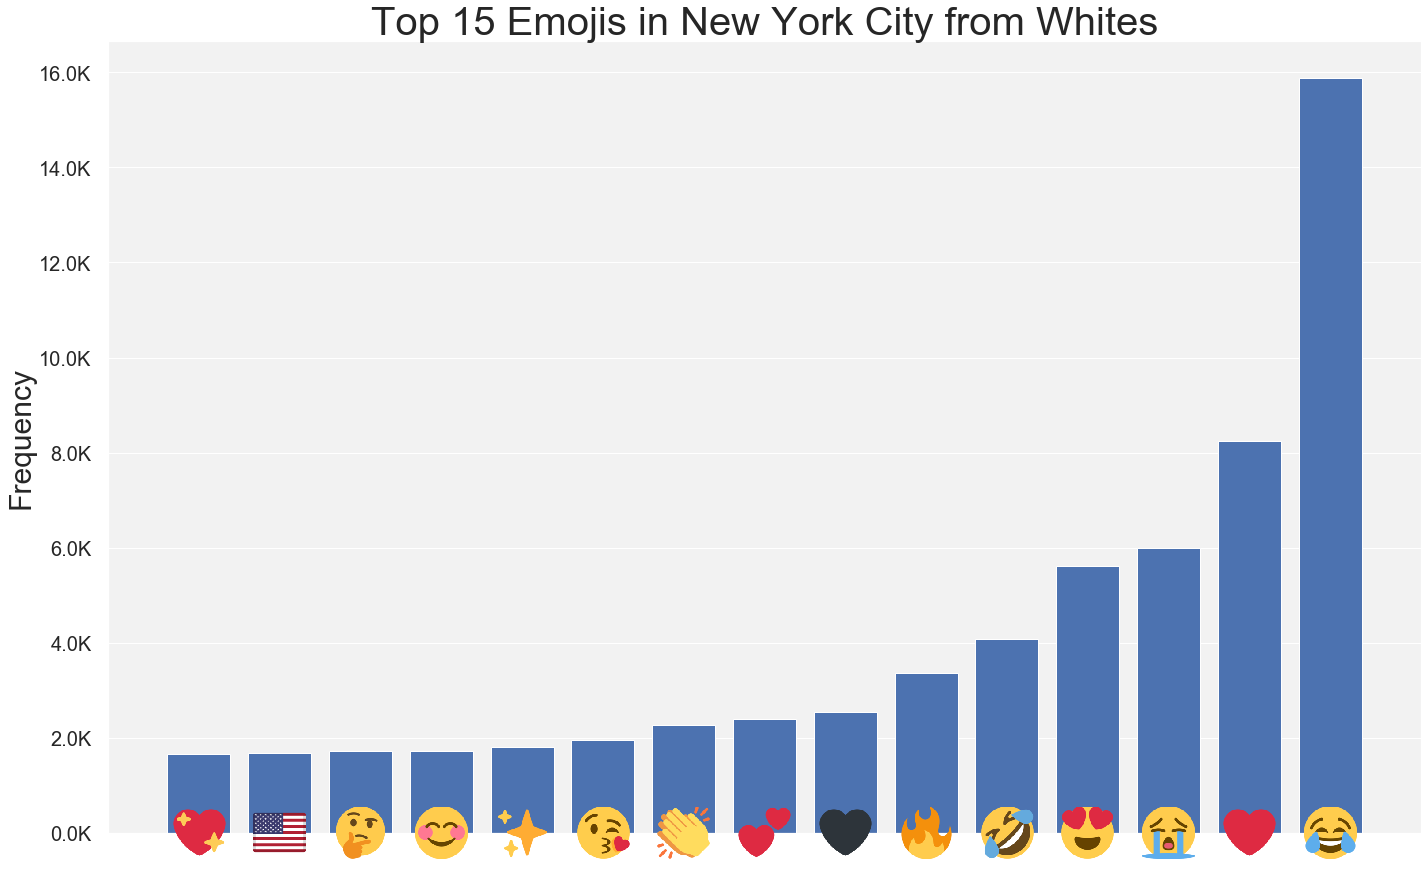

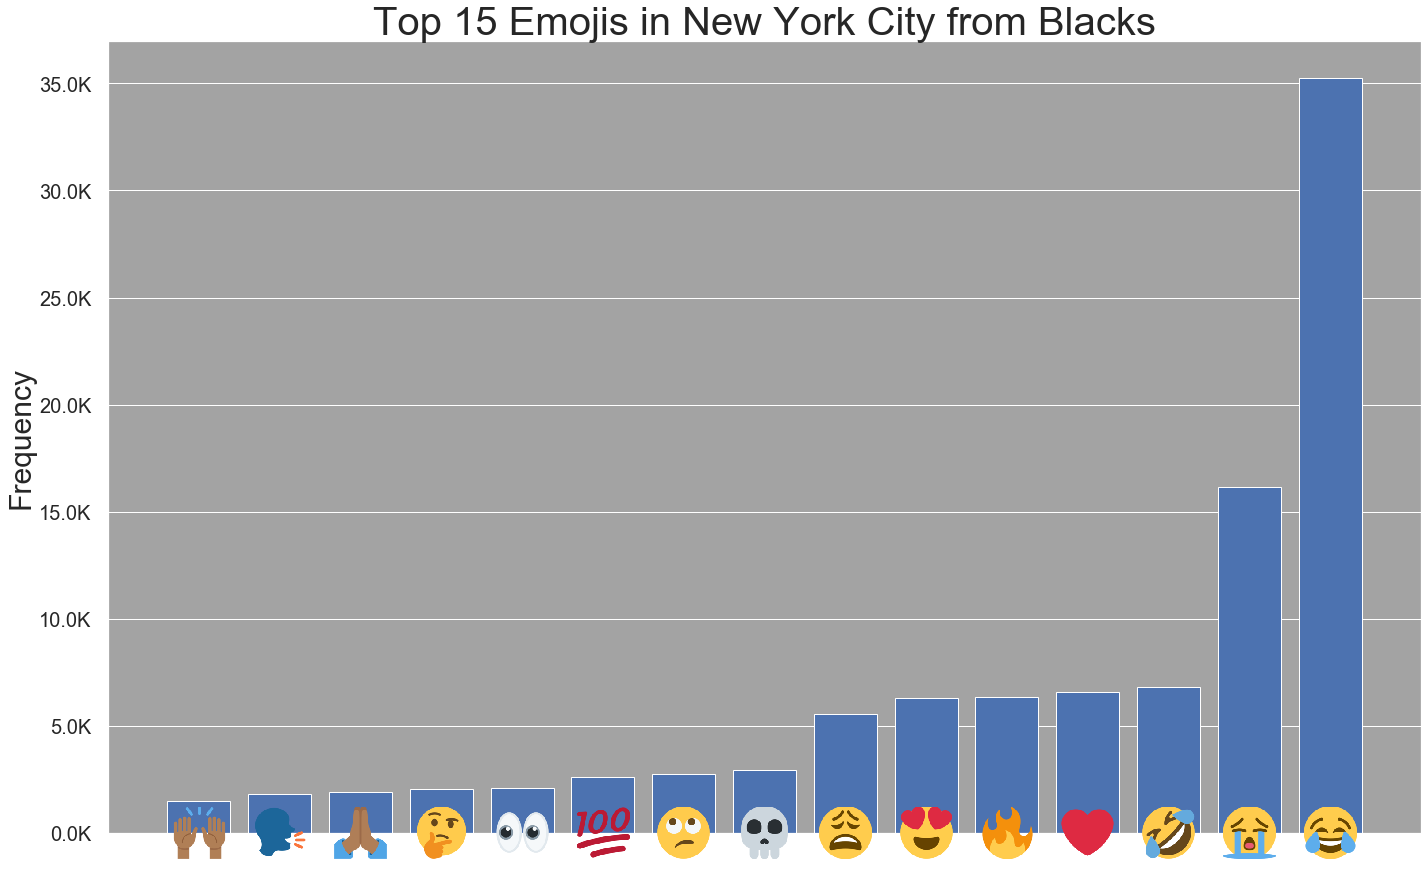

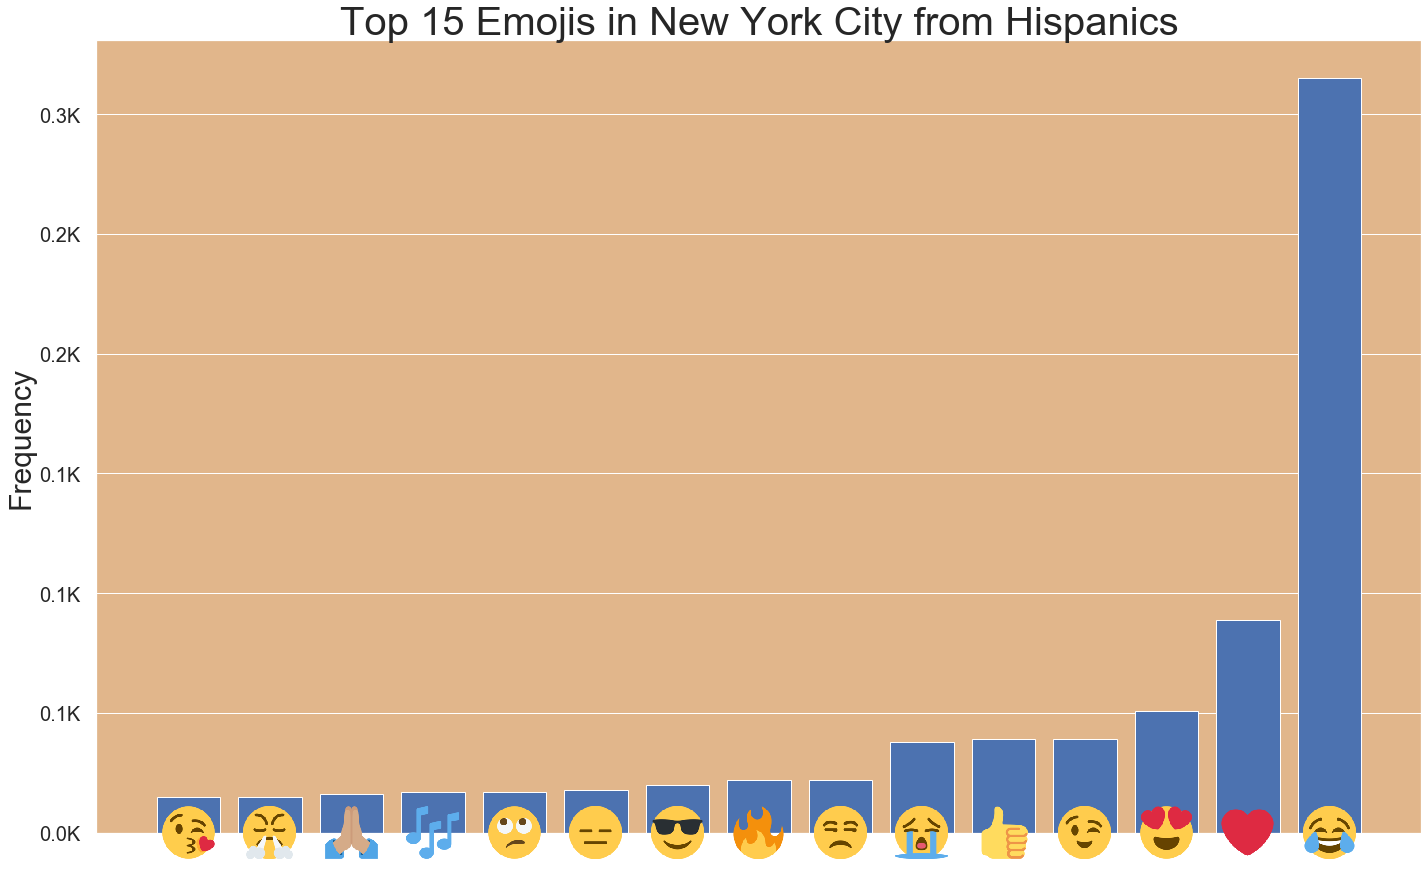

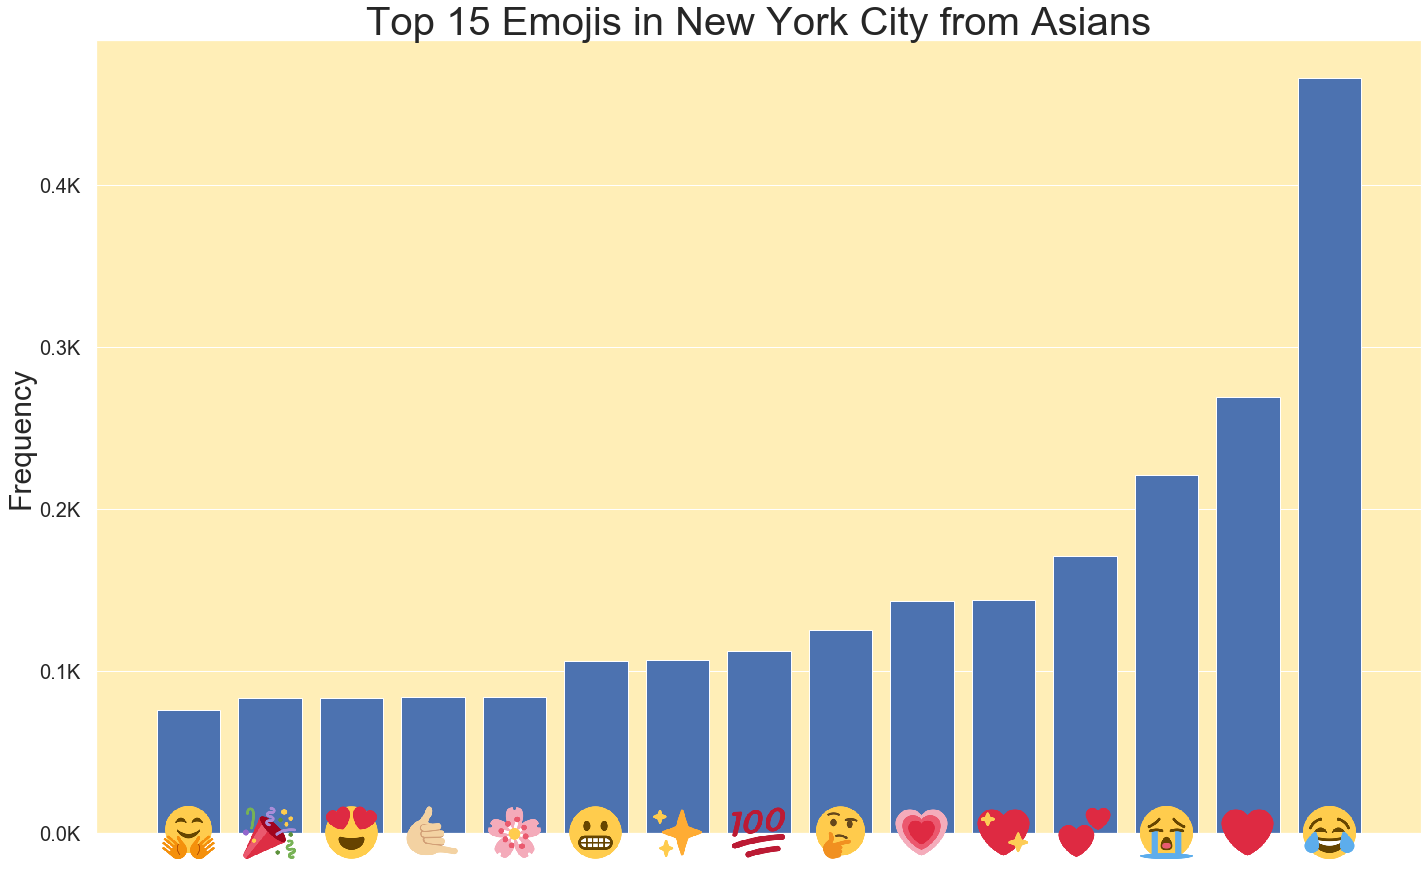

In [12]:
ethnicities_list = ['Whites','Blacks','Hispanics','Asians']
ethnicities_values =[emojis_count_white_df,emojis_count_black_df,emojis_count_hispanic_df,emojis_count_asian_df]
ethnicities_graph_colours=['f2f2f2','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['Count'].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_millions)
    ax.tick_params(axis='both', which='major', pad=10)
    ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top 15 Emojis in New York City from {}'.format(ethnicities_list[ind]), fontsize =40)
    plt.tight_layout()

    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]


    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0)) # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

    plt.show()